In [1]:
import numpy as np
rand = np.random.RandomState(42)

mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Seecting random points

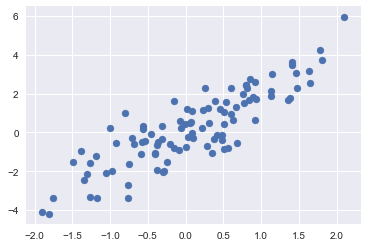

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Select 20 random points

In [3]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([88, 18, 99, 84, 34,  8, 21, 53, 82, 61, 68, 87, 56, 41, 32, 36, 29,
       63,  2, 83])

In [4]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

plot the points that were selected:

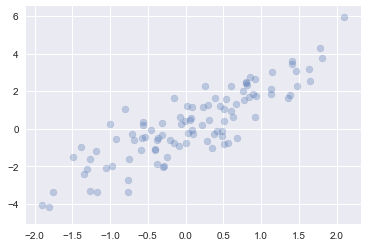

In [5]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Binning data by hand

In [6]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

the count reflects the number of points in each bin

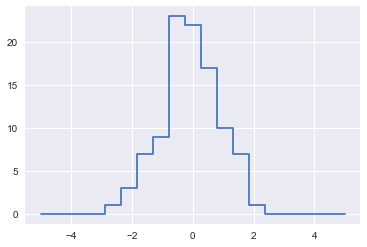

In [7]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

same using hist:

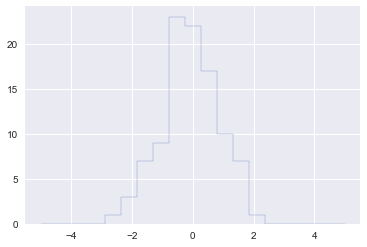

In [8]:
plt.hist(x, bins, histtype='step');

compare the performance:

In [9]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:


The slowest run took 7.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 64.1 µs per loop
Custom routine:


The slowest run took 11.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.7 µs per loop


compare the performance on large array:

In [10]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:


10 loops, best of 3: 69.6 ms per loop
Custom routine:


10 loops, best of 3: 143 ms per loop
